# Improved Random Forest Model

## Three Approaches to Making a Better ML Model

1. More high-quality data.
2. Hyperparameter tuning of algorithm.
3. Trying different algorithm.

## Starting from Previous Model

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Reading in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('./temps.csv')
original_features = pd.get_dummies(original_features)

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Removing the labels from the features
original_features = original_features.drop('actual', axis=1)  # axis 1 refers to the columns


# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Converting to numpy array
original_features = np.array(original_features)

# Splitting the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size=0.25, random_state=42)

# The baseline predictions are the historical averages
baseline_preds = original_test_features[:, original_feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - original_test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Training the model on training data
rf.fit(original_train_features, original_train_labels)

# Using the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculating the absolute errors
errors = abs(predictions - original_test_labels)

# Printing out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

# Comparing to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculating mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average baseline error:  5.06 degrees.
Average model error: 3.87 degrees.
Improvement over baseline: 23.45 %.
Accuracy: 93.93 %.


## Collecting More Data

In [2]:
features = pd.read_csv('./temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [3]:
"""
- Here format(*features.shape) is used to provide values for the placeholders in the string.
- features.shape returns a tuple containing two values (here days and variables).
- The * operator before features.shape unpacks the tuple into individual arguments. This means if features.shape is (30, 5), it will be unpacked to 30, 5.
- The values obtained from features.shape (e.g., 30 and 5) are inserted into the placeholders {} in the string.
- The first {} will be replaced by the first value (30), and the second {} will be replaced by the second value (5).
"""
print('We have {} days of data with {} number of variables'.format(*features.shape))

We have 2191 days of data with 12 number of variables


## Numerical Inspection of Data

In [4]:
round(features.describe(), 2)

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2013.50,6.52,15.71,7.37,0.12,0.01,61.17,61.18,60.29,61.18,60.31
std,1.71,3.45,8.80,3.15,0.25,0.15,13.09,13.08,10.73,13.08,15.87
min,2011.00,1.00,1.00,0.89,0.00,0.00,29.00,29.00,45.10,29.00,25.00
25%,2012.00,4.00,8.00,5.14,0.00,0.00,51.00,51.00,50.10,51.00,49.00
50%,2014.00,7.00,16.00,6.71,0.00,0.00,60.00,60.00,58.80,60.00,60.00
75%,2015.00,10.00,23.00,9.17,0.12,0.00,71.00,71.00,70.20,71.00,71.00
max,2017.00,12.00,31.00,21.25,2.20,3.00,96.00,96.00,77.40,96.00,97.00


## Inspection of Data by Visualisation

In [5]:
import datetime
import matplotlib.pyplot as plt

#Getting days, months and years
years = features['year']
months = features['month']
days = features['day']

#Listing them and then converting to datetime object

"""
- 'years, months, and days are lists of numerical values representing year, month, and day respectively.
- 'str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) constructs a string in the format 'YYYY-MM-DD' for each set of (year, month, day) values.
- 'int(year), int(month), int(day) are used to ensure each value is treated as an integer before converting to a string. This helps avoid leading zeros in the resulting string representation.
- 'str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) combines these integers into the desired format.
- 'zip(years, months, days) pairs up corresponding elements from years, months, and days lists.

- The resulting list dates will contain strings like 'YYYY-MM-DD' for each corresponding set of (year, month, day) values from years, months, and days
"""
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day))for year, month, day in zip(years, months, days)]

"""
- datetime.datetime.strptime(date, '%Y-%m-%d') converts each string date in the dates list back into a datetime.datetime object.
- 'datetime.strptime(date, '%Y-%m-%d') is a method from the datetime module used to parse a string (date) into a datetime object.
- The format '%Y-%m-%d' specifies the expected format of the input string (date), where:
    %Y represents the year with century as a decimal number.
    %m represents the month as a zero-padded decimal number (01 to 12).
    %d represents the day of the month as a zero-padded decimal number (01 to 31).
- Therefore, datetime.datetime.strptime(date, '%Y-%m-%d') converts each string date (in the format 'YYYY-MM-DD') into a datetime.datetime object.
"""
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

%matplotlib inline

# Setting the style
plt.style.use('fivethirtyeight')

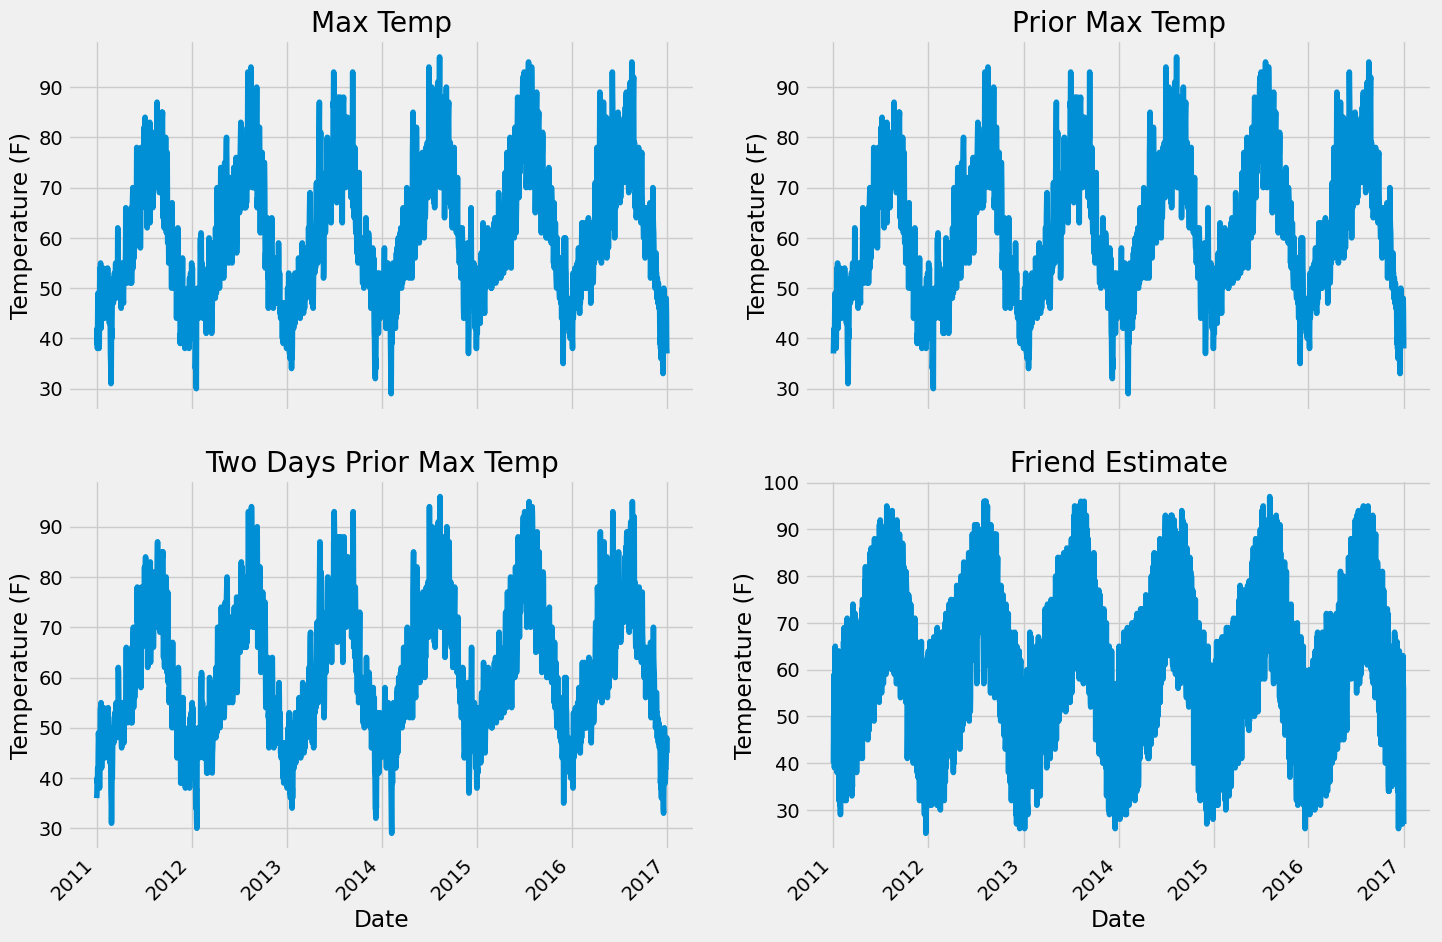

In [6]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.autofmt_xdate(rotation=45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature (F)')
ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (F)')
ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature (F)')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

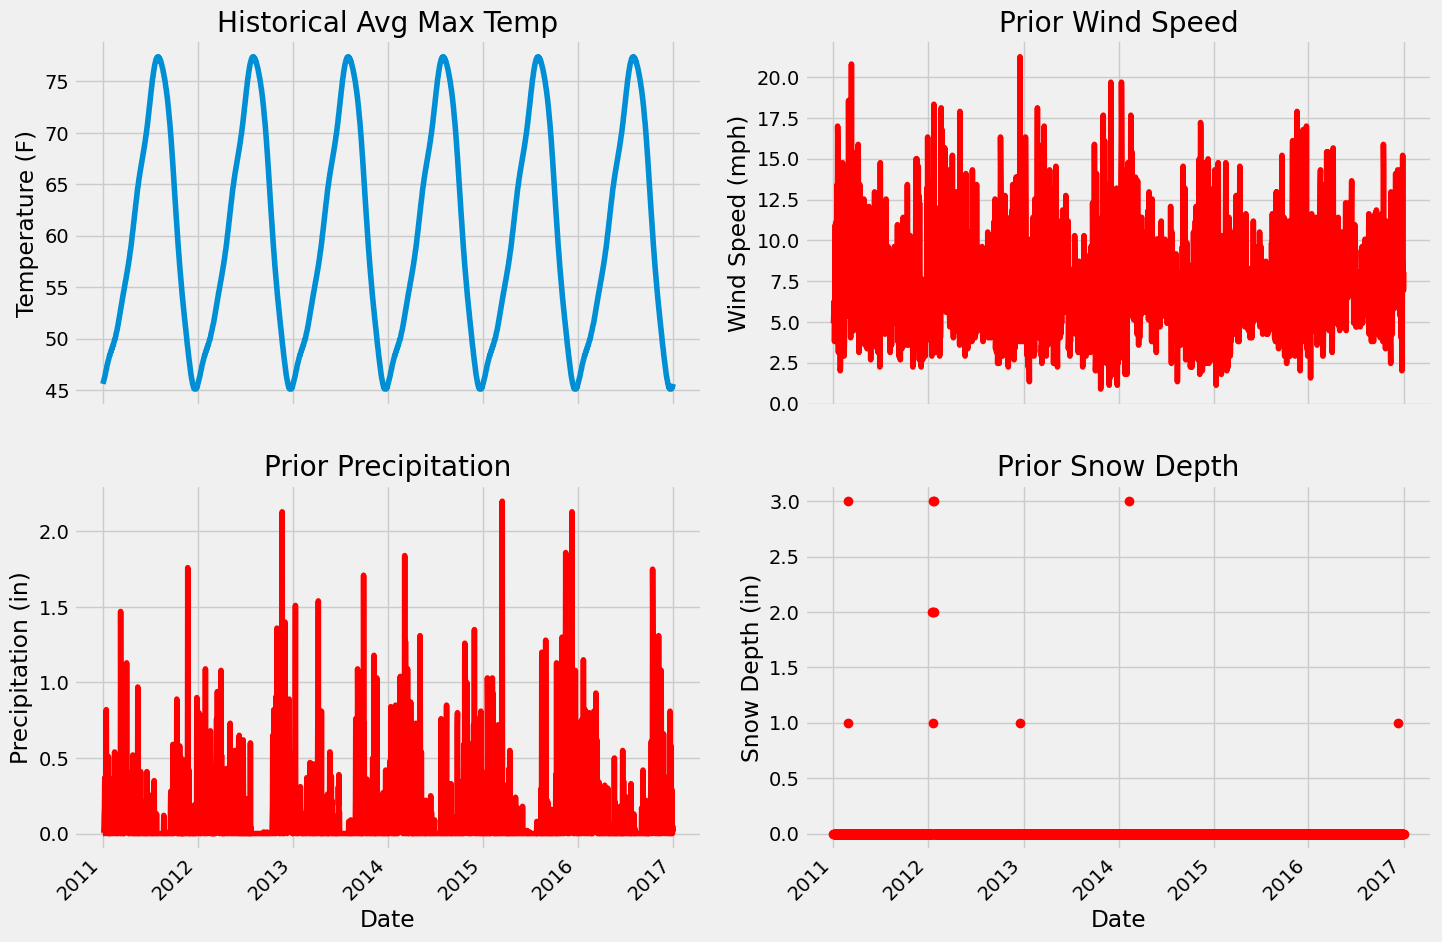

In [7]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.autofmt_xdate(rotation=45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel('')
ax2.set_ylabel('Wind Speed (mph)')
ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date')
ax3.set_ylabel('Precipitation (in)')
ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date')
ax4.set_ylabel('Snow Depth (in)')
ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)